# SPAM Challenge
## Share your solution 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold,cross_val_score, cross_validate
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit



In [10]:
raw_data = pd.read_csv("./data/SMSSpamCollection.tsv", sep='\t', names = ['label', 'text'])
pd.set_option('display.max_colwidth', 100)
raw_data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


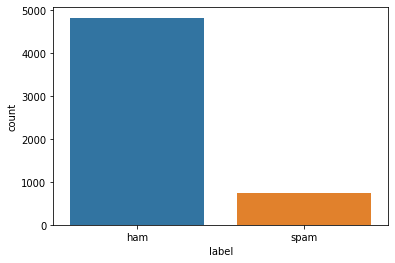

In [12]:
sns.countplot(x = 'label', data = raw_data)

In [13]:
raw_data.loc[:,'label'] = raw_data.label.map({'ham':0, 'spam':1})

In [14]:
X = raw_data.text
y = raw_data.label

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 99)

In [26]:
X_test_dtm.shape

(1393, 4078)

In [49]:
vect = CountVectorizer()
#vect = CountVectorizer(ngram_range = (1,2), min_df = 2, stop_words = 'english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

#use naive bayes
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

#calculate accuracy
print((metrics.accuracy_score(y_test,y_pred_class)))


0.9899497487437185


Text(0.5, 1, 'Confusion Matrix')

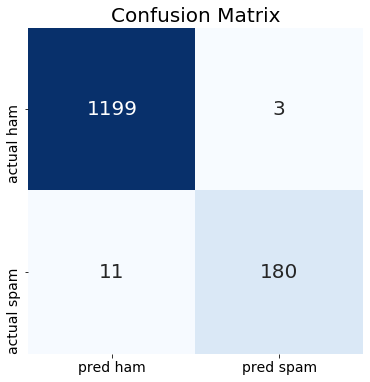

In [50]:
conmat = np.array(confusion_matrix(y_test, y_pred_class))
confusion = pd.DataFrame(conmat, index=['actual ham', 'actual spam'], \
                        columns = ['pred ham', 'pred spam'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot= True, annot_kws = {"size":20}, cmap='Blues',fmt='d', cbar = False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize = 20)

In [42]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1202
           1       0.98      0.94      0.96       191

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



## tradeoff between TP and FN
### what if we lose some of 180 but get less than 3 ham that is predicted as spam?

# let's play with the parameters

# NLP these days
## Embeddings
### word2vec
## Context Embeddings
### Attention is all you need!
### GPT2, GPT3, BERT (puppet models)
#### https://www.youtube.com/watch?v=TjUvMQvrjrg
## Transfer Learning

# ML Models Pros and Cons
- Computation (Training vs. Inference)
   - Which one of the algorithms we went though needs a lot of computation?
       - DT, RF, LR, NB, KNN, ... ?
   - Deep learning
   <!-- KNN -->
- Latency (Inference Time)
    - Pre processing (Normalization/Scaling/Vectorization)
    - Which algorithm is the worst?
- Explainability 
    - In some applications, explainability of the decision is more important than the decision!
    - Trees are pretty much explainable
    - Logistic regression vs Decision tree? 
        - Normalization in LR is valuble here!
    - Deep Learning is not explainable!
        - Explainable AI
    
- Real time learning (offline vs online)
    - Spam detection?
        - You have to update your model every minute! 
            - Online learning
    - Churn detection?
        - Offline learning
    - Tree vs Naive Bayes? Which one is a better online learner?
        
- Federated Learning (Privacy Consideration)
    - https://ai.googleblog.com/2017/04/federated-learning-collaborative.html
    - advertisement, home assistants
        - Models are on your device
        - You cannot send data or models running on your phone back to cloud
        - How can you come up with a privacy compliant small set of parameters to take care of this 
            - Send the parameters rather than data for aggregation
            - Privacy is a critical component
        
- Performance
    - Confusion matrix is all you need!
    - Precision, recall, fscore, accuracy
    - Domain adapted measures: combination of the matrix with the domain knowledge (e.g., classification cost)
- Amount of required data for training (instances, features)
    - Deep learning needs a huge amount of data
    - Few hundreds of instance? DT or RF!
- Maintainability
    - Building a perfect model is just 60% of the process!
    - Concept drift, novelty, ...
    - 40% of ML in production



